In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel("Orders.xlsx", parse_dates=["order_date"])

In [4]:
# Data Cleaning - Handling Missing Values
df.fillna({"sales": 0, "profit": 0, "discount": 0}, inplace=True)

In [6]:
df.head(10)

,order_id,order_info_id,order_id_number,return_reason,order_date,order_weekday,order_month,ship_date,ship_mode,product_id,...,discount_over_30,region_id,postal_code,city,state,sub_region,salesperson,customer_id,customer_name,segment
0,AE-2019-1231682,AE-2019,1231682,Not Returned,2019-12-18,Wednesday,December,12/23/2019,Second Class,TEC-MOT-10001535,...,1,1488,47374,Richmond,Indiana,Central United States,Annelise Williams,GH-4665,Greg Hansen,Consumer
1,AE-2019-1263608,AE-2019,1263608,Not Returned,2019-12-26,Thursday,December,12/31/2019,Second Class,OFF-AVE-10004827,...,1,1488,78745,Austin,Texas,Central United States,Annelise Williams,GH-4665,Greg Hansen,Consumer
2,AE-2019-303016,AE-2019,303016,Not Returned,2019-12-18,Wednesday,December,12/23/2019,Second Class,TEC-MOT-10001535,...,1,1488,52402,Cedar Rapids,Iowa,Central United States,Annelise Williams,GH-4665,Greg Hansen,Consumer
3,AE-2019-304471,AE-2019,304471,Not Returned,2019-12-27,Friday,December,12/31/2019,Second Class,TEC-MOT-10001535,...,1,1488,60653,Chicago,Illinois,Central United States,Annelise Williams,GH-4665,Greg Hansen,Consumer
4,AE-2019-3123605,AE-2019,3123605,Not Returned,2019-11-30,Saturday,November,12/5/2019,Second Class,OFF-ROG-10001340,...,1,1488,55901,Rochester,Minnesota,Central United States,Annelise Williams,PG-8820,Patrick Gardner,Consumer
5,AE-2019-3179243,AE-2019,3179243,Not Returned,2019-11-18,Monday,November,11/19/2019,Second Class,TEC-MOT-10001535,...,1,1488,75220,Dallas,Texas,Central United States,Annelise Williams,GH-4665,Greg Hansen,Consumer
6,AE-2019-3323423,AE-2019,3323423,Not Returned,2019-12-06,Friday,December,12/11/2019,Second Class,OFF-ELD-10002297,...,1,1488,78745,Austin,Texas,Central United States,Annelise Williams,GH-4665,Greg Hansen,Consumer
7,AE-2019-3371820,AE-2019,3371820,Not Returned,2019-12-26,Thursday,December,12/31/2019,Second Class,OFF-ELD-10002297,...,1,1488,49505,Grand Rapids,Michigan,Central United States,Annelise Williams,GH-4665,Greg Hansen,Consumer
8,AE-2019-350473,AE-2019,350473,Not Returned,2019-03-25,Monday,March,3/29/2019,Same Day,OFF-HON-10004621,...,0,1488,78577,Pharr,Texas,Central United States,Annelise Williams,JD-5790,John Dryer,Consumer
9,AE-2019-4073208,AE-2019,4073208,Not Returned,2019-01-13,Sunday,January,1/18/2019,Second Class,OFF-TEN-10002817,...,1,1488,52402,Cedar Rapids,Iowa,Central United States,Annelise Williams,MY-7380,Maribeth Yedwab,Corporate


In [7]:
# Extract Year and Month for trend analysis
df["Year"] = df["order_date"].dt.year
df["Month"] = df["order_date"].dt.month
df["Month_Name"] = df["order_date"].dt.strftime('%b')

In [8]:
# Aggregate sales data by Month
monthly_sales = df.groupby(["Year", "Month_Name"])["sales"].sum().reset_index()


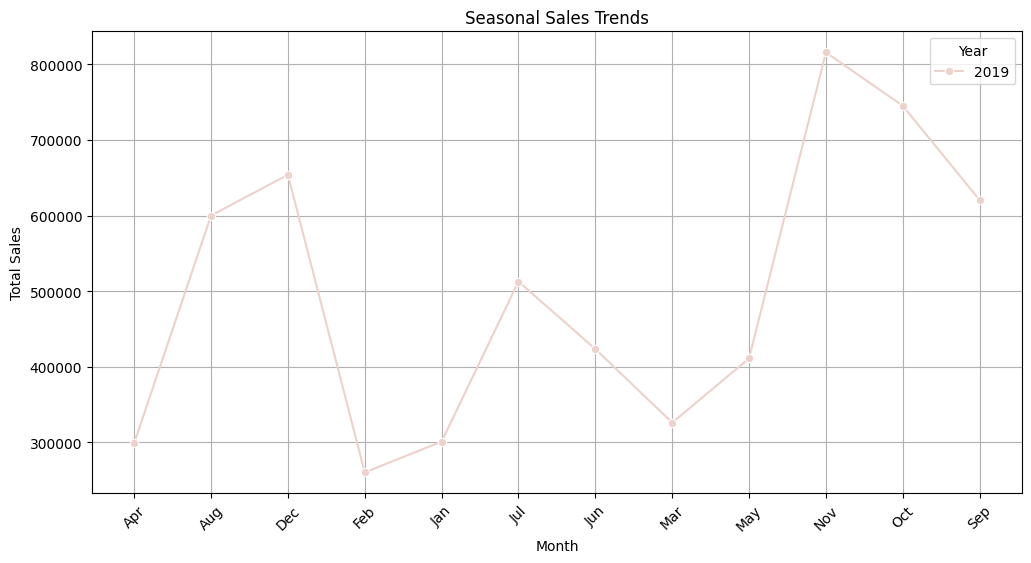

In [10]:
# Visualizing Seasonal Sales Trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x="Month_Name", y="sales", hue="Year", marker="o")
plt.title("Seasonal Sales Trends")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.legend(title="Year")
plt.grid(True)
plt.show()